Importing necessary libraries and packages

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings

In [43]:
warnings.filterwarnings("ignore")

Loading the dataset

In [44]:
df=pd.read_csv("SalesPrediction.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Information about the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Describing the dataset

In [46]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Checking for missing values

In [47]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Checking for duplicate values

In [48]:
duplicate = df.loc[df.duplicated(keep = False)]
duplicate

,TV,Radio,Newspaper,Sales


Checking the data types

In [49]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Checking for outliers

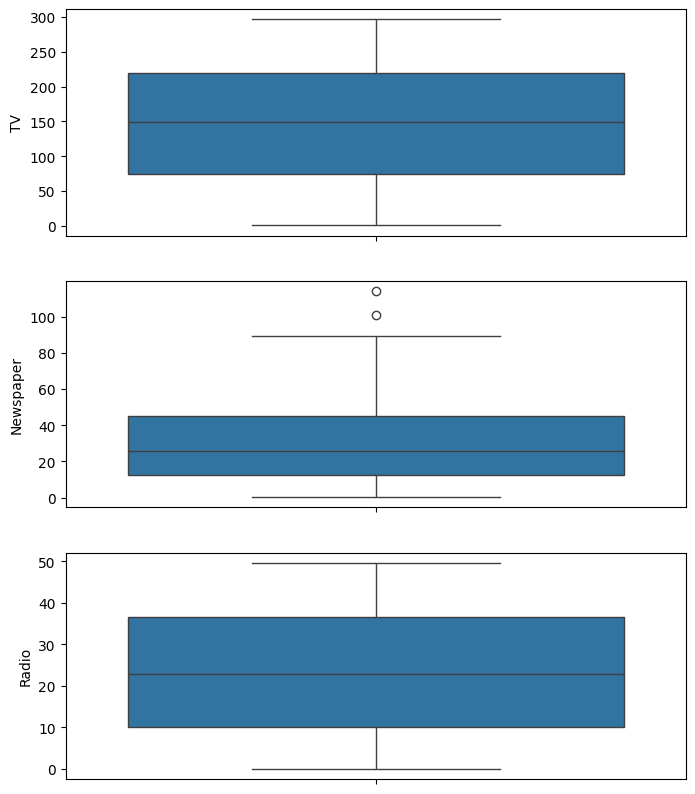

In [50]:
fig, axs = plt.subplots(3, figsize = (8,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])

Plotting the relation of different features with output

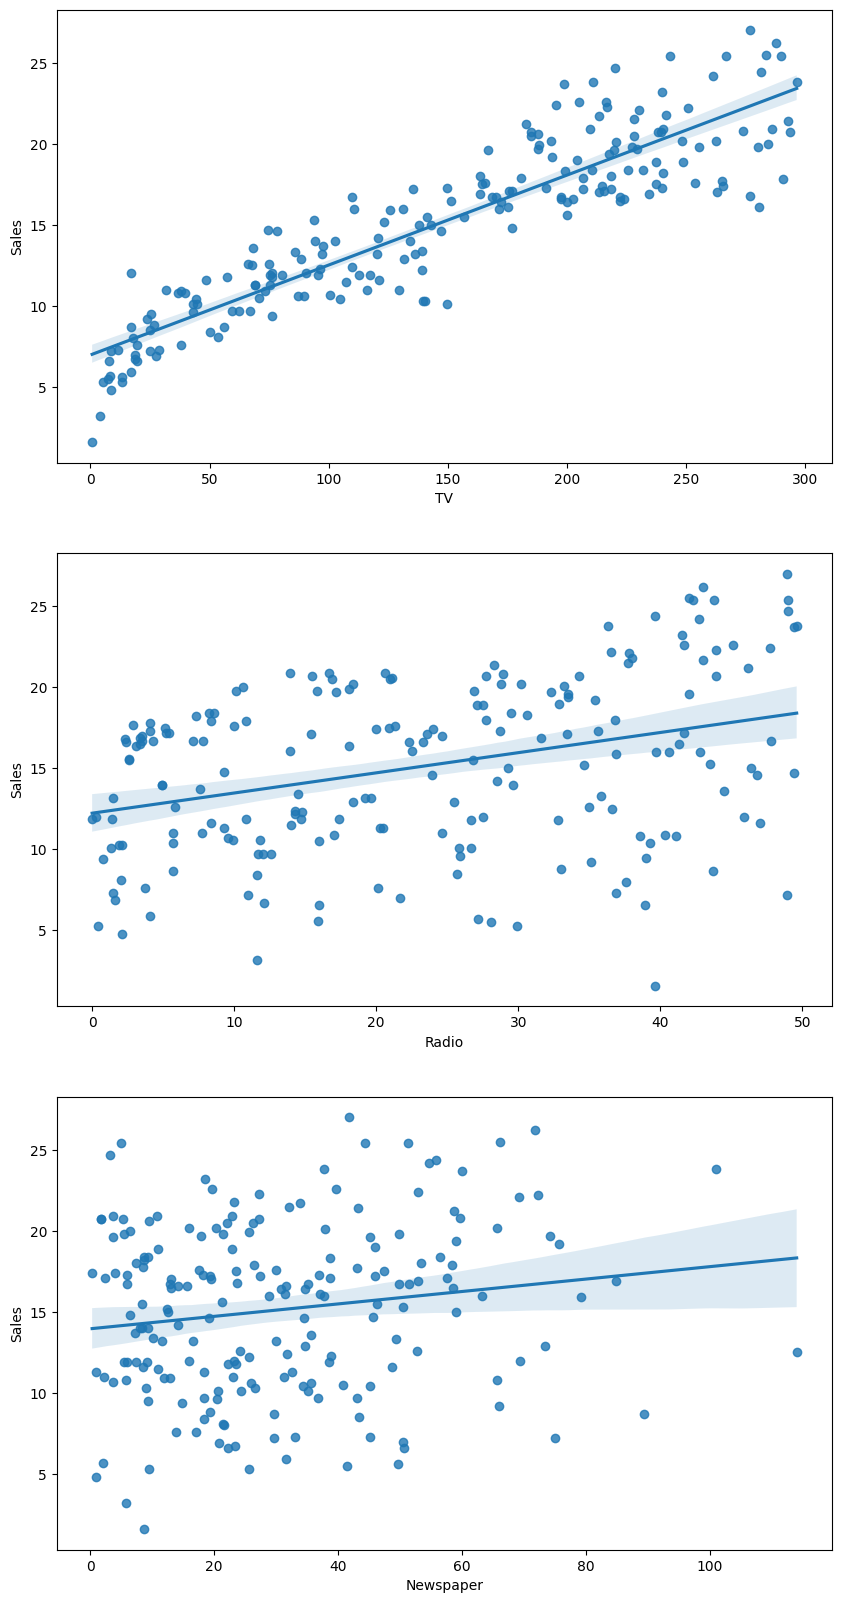

In [51]:
fig, axs = plt.subplots(3,figsize = (10,20))
plt1 = sns.regplot(data=df,x='TV',y='Sales', ax = axs[0])
plt2 = sns.regplot(data=df,x='Radio',y='Sales', ax = axs[1])
plt3 = sns.regplot(data=df,x='Newspaper',y='Sales', ax = axs[2])

Plotting Heatmap

<Axes: >

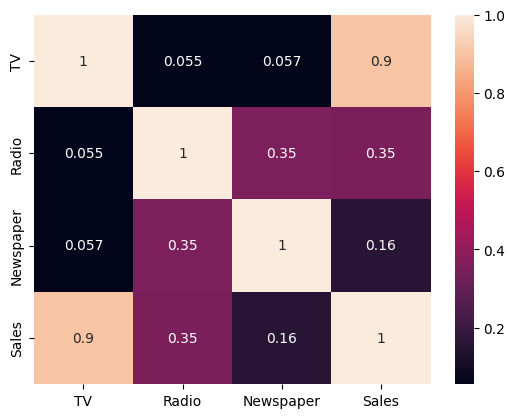

In [52]:
sns.heatmap(df.corr(),annot=True)

Splitting input and output

In [53]:
X=df.drop(['Sales'],axis=1).values
y=df.iloc[:,-1]

Scaling input values

In [54]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


Splitting data for training and testing purpose

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.2)

Model building ( Linear Regression )

In [56]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Evaluating model performance

In [57]:
y_pred=model.predict(X_test)

In [58]:

print('r2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.9217965732000768
MAE: 1.0237773779313244
MSE: 1.87411384188944
RMSE: 1.3689827763304547


Predicting new value

In [59]:
y_new=model.predict([[123,34,23]])
y_new.item()

14.958331548678247